In [23]:
import pandas as pd
import networkx as nx
import utilities as ut
import Complexity as cx
import matplotlib.pyplot as plt

In [12]:
index = ["dolphins","pdzbase","hamsterster","Roget","flight","GBPT_train"]
index_bus = ["london","paris","berlin","sydney","detroit","beijing"]
load_path = ["real_networks/processed/"+item+".csv" for item in index]
load_path_bus = ["bus/processed/"+item+".csv" for item in index_bus]
load_path_bus_m = ["bus/modified/m_"+item+".csv" for item in index_bus]
graphs = [ut.df_to_network(pd.read_csv(item)) for item in load_path]
bus = [ut.df_to_network(pd.read_csv(item)) for item in load_path_bus]
bus_m = [ut.df_to_network(pd.read_csv(item)) for item in load_path_bus_m]

In [13]:
l = [nx.average_shortest_path_length(g) for g in graphs]       
l_bus = [nx.average_shortest_path_length(g) for g in bus]
l_bus_m = [nx.average_shortest_path_length(g) for g in bus_m]

L - dolphins - 3.3569539925965097
L - pdzbase - 5.326086956521739
L - hamsterster - 3.216885407901945
L - Roget - 4.075388889226598
L - flight - 4.103241167898093
L - GBPT_train - 10.38356882733828
L - dolphins - 32.338040452032565
L - pdzbase - 47.63116803725628
L - hamsterster - 33.28420396981455
L - Roget - 36.131348439544595
L - flight - 70.5125685001483
L - GBPT_train - 27.89102427046261
L - m_dolphins - 32.338040452032565
L - m_pdzbase - 47.63116803725628
L - m_hamsterster - 33.28420396981455
L - m_Roget - 36.131348439544595
L - m_flight - 70.5125685001483
L - m_GBPT_train - 27.89102427046261


In [17]:
for i in range(len(index)):
    print("L - "+index[i]+" - " + str(l[i]))
for i in range(len(index_bus)):
    print("L - "+index_bus[i]+" - " + str(l_bus[i])) 
for i in range(len(index_bus)):
    print("L - m_"+index_bus[i]+" - " + str(l_bus_m[i]))

L - dolphins - 3.3569539925965097
L - pdzbase - 5.326086956521739
L - hamsterster - 3.216885407901945
L - Roget - 4.075388889226598
L - flight - 4.103241167898093
L - GBPT_train - 10.38356882733828
L - london - 32.338040452032565
L - paris - 47.63116803725628
L - berlin - 33.28420396981455
L - sydney - 36.131348439544595
L - detroit - 70.5125685001483
L - beijing - 27.89102427046261
L - m_london - 18.308409049942462
L - m_paris - 15.385734266541235
L - m_berlin - 18.35975819591666
L - m_sydney - 17.66539095915279
L - m_detroit - 6.341150697567162
L - m_beijing - 14.863657915805842


In [18]:
lr = [ut.lr(g) for g in graphs]
for i in range(len(index)):
    print("Lr - "+index[i]+" - " + str(l[i]))         
lr_bus = [ut.lr(g) for g in bus]
for i in range(len(index_bus)):
    print("Lr - "+index[i]+" - " + str(l_bus[i]))  
lr_bus_m = [ut.lr(g) for g in bus_m]
for i in range(len(index_bus)):
    print("Lr - m_"+index[i]+" - " + str(l_bus_m[i]))

Lr - dolphins - 3.3569539925965097
Lr - pdzbase - 5.326086956521739
Lr - hamsterster - 3.216885407901945
Lr - Roget - 4.075388889226598
Lr - flight - 4.103241167898093
Lr - GBPT_train - 10.38356882733828
Lr - dolphins - 32.338040452032565
Lr - pdzbase - 47.63116803725628
Lr - hamsterster - 33.28420396981455
Lr - Roget - 36.131348439544595
Lr - flight - 70.5125685001483
Lr - GBPT_train - 27.89102427046261
Lr - m_dolphins - 18.308409049942462
Lr - m_pdzbase - 15.385734266541235
Lr - m_hamsterster - 18.35975819591666
Lr - m_Roget - 17.66539095915279
Lr - m_flight - 6.341150697567162
Lr - m_GBPT_train - 14.863657915805842


In [21]:
result_g = [cx.MAri(g) for g in graphs]
result_bus = [cx.MAri(g) for g in bus]
result_bus_m = [cx.MAri(g) for g in bus_m]

([<matplotlib.axis.YTick at 0x26fcf1d3160>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

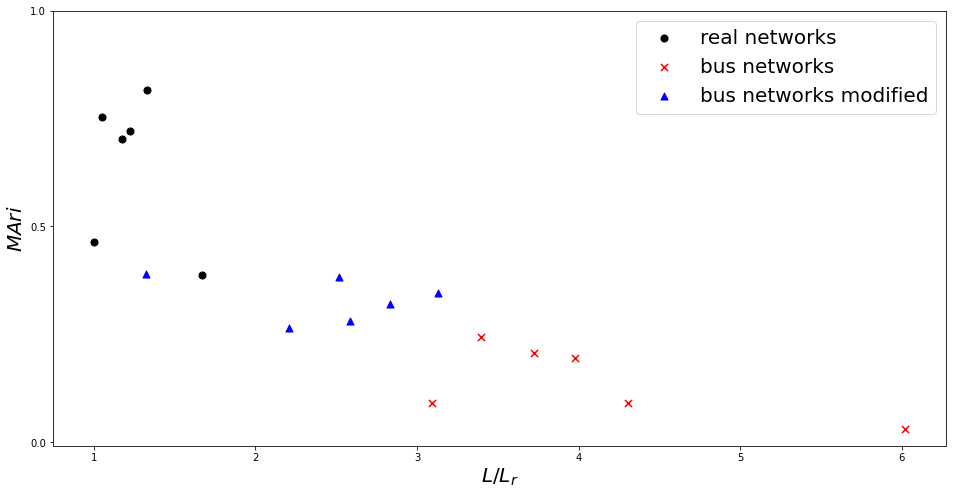

In [40]:
plt.figure(figsize=(16,8))
l_ratio = [item0/item1 for item0,item1 in zip(l,lr)]
l_ratio_bus = [item0/item1 for item0,item1 in zip(l_bus,lr_bus)]
l_ratio_bus_m = [item0/item1 for item0,item1 in zip(l_bus_m,lr_bus_m)]
plt.scatter(l_ratio,result_g,color = "black",s=50,label = "real networks")
plt.scatter(l_ratio_bus,result_bus,color = "red",s=50,marker = "x",label ="bus networks")
plt.scatter(l_ratio_bus_m,result_bus_m,color = "blue",marker = "^",s=50,label = "bus networks modified")
plt.legend(fontsize = 20)
plt.xlabel("$L/L_r$",fontsize = 20)
plt.ylabel("$MAri$",fontsize = 20)
plt.yticks([0,0.5,1])